In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
file_name = "./data/SCFP2019.csv.gz"
df = pd.read_csv(file_name)
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


#### Data Wrangling

In [243]:
mask = df["TURNFEAR"] ==1
print(mask.sum())
mask.head(10)


4623


0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: TURNFEAR, dtype: bool

In [244]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


#### Exploratory Data Analysis

In [245]:
df_fear["AGECL"].head()

5    3
6    3
7    3
8    3
9    3
Name: AGECL, dtype: int64

In [246]:
df_fear["AGECL"].nunique()

6

In [247]:
df_fear["AGECL"].unique()

array([3, 5, 1, 2, 4, 6])

In [248]:
agecl_dict = {
    1:"Under 35",
    2:"35-40",
    3:"45-54",
    4:"55-64",
    5:"65-74",
    6:"75 or Older"
}

age_cl = df_fear["AGECL"].replace(agecl_dict)

In [249]:
age_cl.head(10)

5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

    Age Groups Bar Chart

In [250]:
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

In [251]:
age_cl.value_counts()

AGECL
Under 35       1307
35-40          1093
45-54           932
55-64           745
65-74           401
75 or Older     145
Name: count, dtype: int64

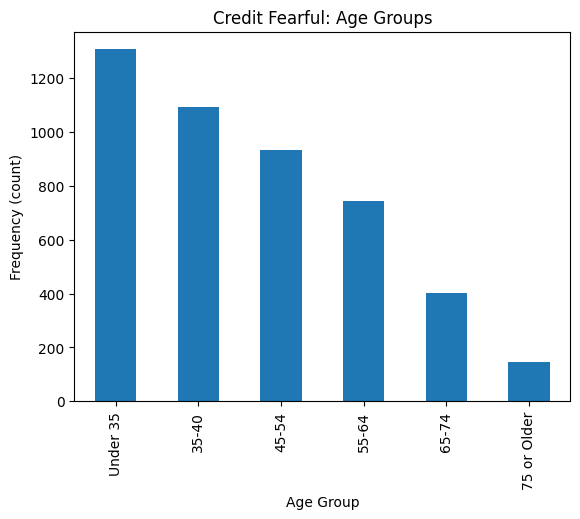

In [252]:
age_cl_value_counts = age_cl.value_counts()

#Bar plot of age_cl_value_counts

age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful: Age Groups"
);

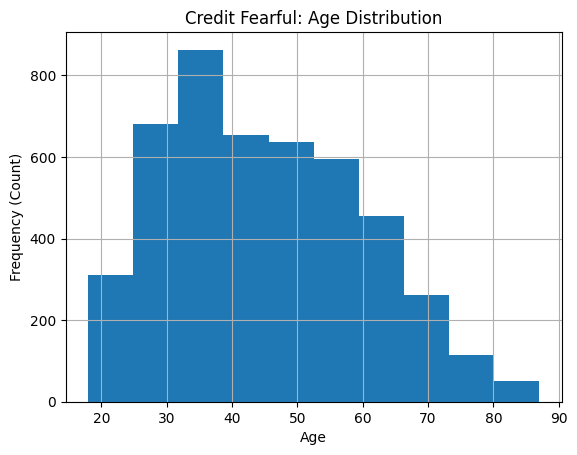

In [253]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(
    bins=10,
    )
plt.xlabel("Age")
plt.ylabel("Frequency (Count)")
plt.title("Credit Fearful: Age Distribution");

    Race

In [254]:
print(df_fear["RACE"].nunique())
print(df_fear["RACE"].unique())

4
[1 3 2 5]


In [255]:
race_dict = {
    1:"White/Non-hispanic",
    2:"Black/African-American",
    3:"Hispanic",
    5:"Other"
}
race = df_fear["RACE"].replace(race_dict)
print(race.head(10))

5      White/Non-hispanic
6      White/Non-hispanic
7      White/Non-hispanic
8      White/Non-hispanic
9      White/Non-hispanic
110    White/Non-hispanic
111    White/Non-hispanic
112    White/Non-hispanic
113    White/Non-hispanic
114    White/Non-hispanic
Name: RACE, dtype: object


In [256]:
race_value_counts = race.value_counts(normalize=True)

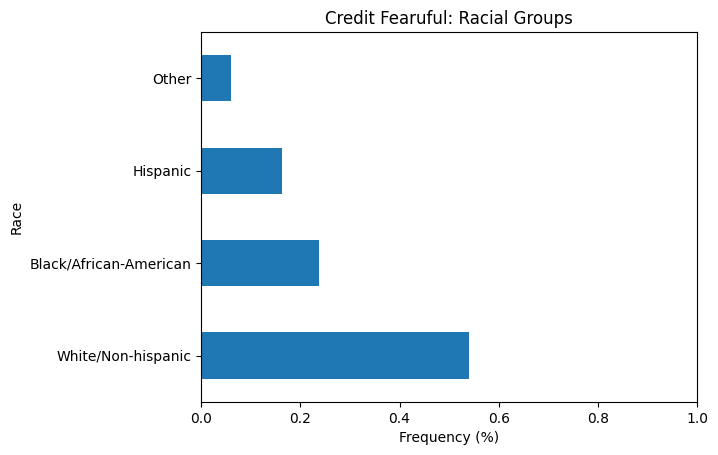

In [257]:
race_value_counts.plot(
    kind="barh"
)
plt.xlim((0,1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearuful: Racial Groups");

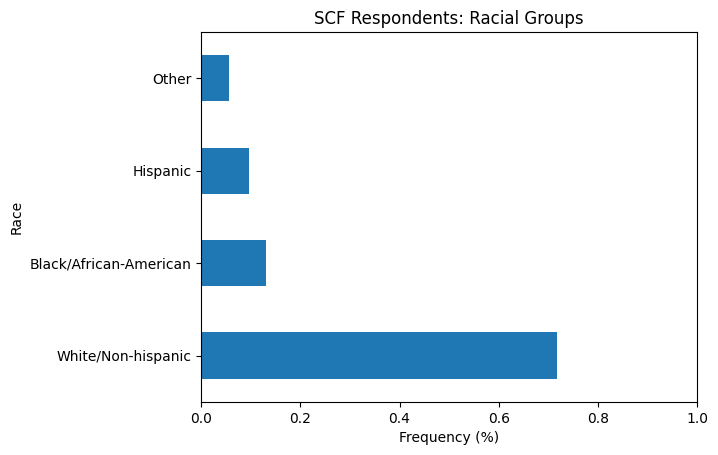

In [258]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
race_value_counts.plot(
    kind="barh"
)
plt.xlim((0,1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

    Income Categories: Credit Fearful vs Credit Fearless

In [259]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"].replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


Text(0.5, 1.0, 'Income Distribution: Credit Fearful vs. Non-fearful')

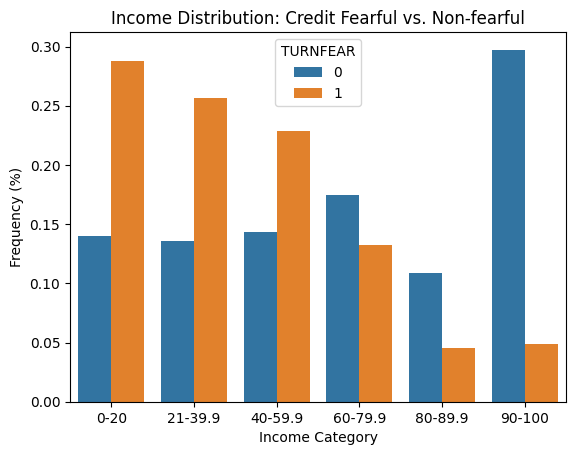

In [260]:
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue="TURNFEAR",
    data= df_inccat,
    order=inccat_dict.values()
)

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful")

    Assets vs Home Value (For whole dataset)

In [261]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779253


    Assets vs Home value (For Credit Fearful Group)

In [262]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.583287973597916


<p style="color: yellow; font-weight: bold">This gives us an insight that for our credit fearful group, the large portion of their total assets is their house.
The non credit fearful groups may have other assets like stocks, bonds businesses etc.</p>

    Correlation Matrix (Whole Dataset)

In [263]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


    Correlation Matrix (Credit Fearful)

In [264]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


<p style="color: yellow; font-weight: bold">We can se above that the highest correlation is between the debt and the house value. That means our credit fearful group has invested a lot of debt about in buying their homes. Most of their debt is carried in their home mortgage. 
Their is still a correlation between income and assets, that means even in our credit fearful group</p>

    Education (Credit Fearful vs non Credit Fearful)

In [265]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)

# print("df_educ type:", type(df_educ))
# print("df_educ shape:", df_educ.shape)
df_educ.head()

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


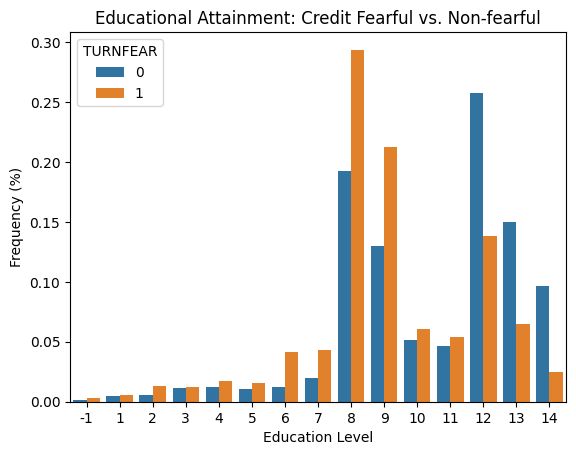

In [266]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue="TURNFEAR",
    data=df_educ
)

plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

    Assets vs Debt (Whole Dataset)

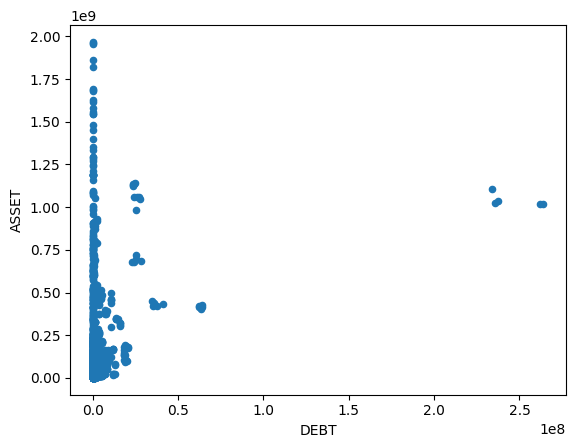

In [267]:
df.plot.scatter(x="DEBT", y="ASSET");

    Assets vs Debt (Credit Fearful)

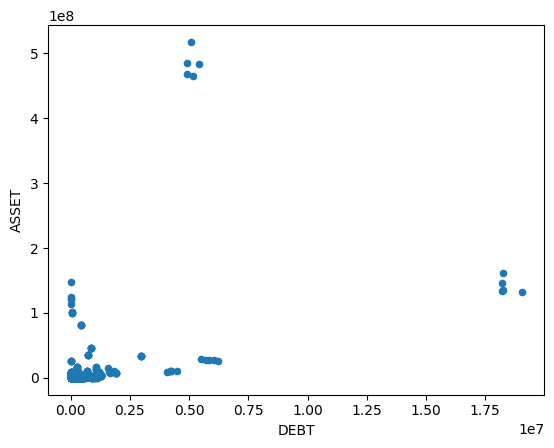

In [268]:
df_fear.plot.scatter(x="DEBT", y="ASSET");

    Home Value vs Debt (Whole Dataset)

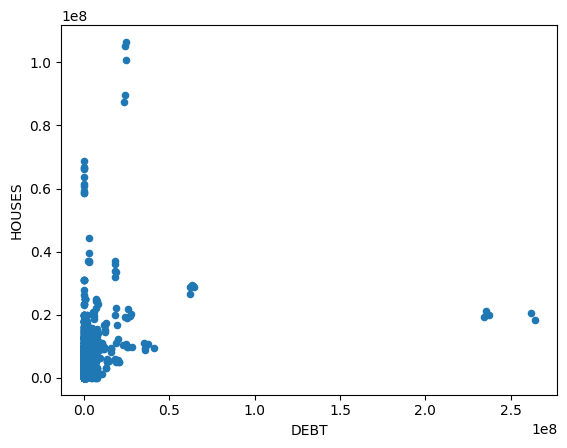

In [269]:
df.plot.scatter(x="DEBT", y="HOUSES");

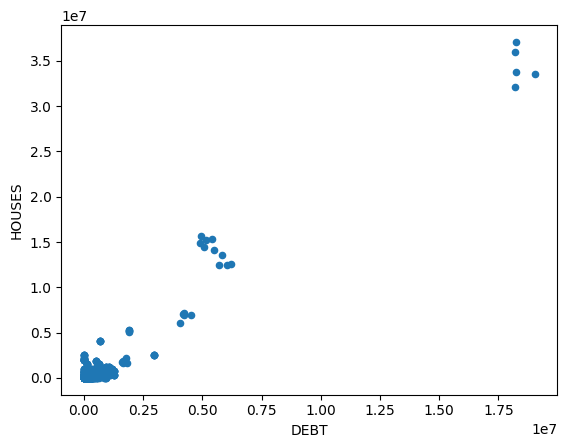

In [270]:
df_fear.plot.scatter(x="DEBT", y="HOUSES");